# <h1><center> BMW Used Car Sales Recommender System </center></h1>

## Descriptive Analysis

In [95]:
### Data input ###
import pandas as pd
data=pd.read_csv('C:/Users/xuyuk/OneDrive - Georgia State University/interview/For specific company/Datacamp/bmw.csv/bmw.csv')
raw_data=data

In [3]:
### General information on data ###
data.describe()

,year,price,mileage,tax,mpg,engineSize
count,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000
mean,2017.078935,22733.408867,25496.986550,131.702068,56.399035,2.167767
std,2.349038,11415.528189,25143.192559,61.510755,31.336958,0.552054
min,1996.000000,1200.000000,1.000000,0.000000,5.500000,0.000000
25%,2016.000000,14950.000000,5529.000000,135.000000,45.600000,2.000000
50%,2017.000000,20462.000000,18347.000000,145.000000,53.300000,2.000000
75%,2019.000000,27940.000000,38206.000000,145.000000,62.800000,2.000000
max,2020.000000,123456.000000,214000.000000,580.000000,470.800000,6.600000


In [4]:
### General information on data ###
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  object 
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  object 
 6   tax           10781 non-null  int64  
 7   mpg           10781 non-null  float64
 8   engineSize    10781 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 758.2+ KB


In [5]:
### Polish the color of graphs ###
from matplotlib import cycler
import matplotlib.pyplot as plt
colors = cycler('color',
                ['#EE6666', '#3388BB', '#9988DD',
                 '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('axes', facecolor='#E6E6E6', edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors)
plt.rc('grid', color='w', linestyle='solid')
plt.rc('xtick', direction='out', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('patch', edgecolor='#E6E6E6')
plt.rc('lines', linewidth=2)

Text(0.5, 1.0, 'Model year VS Price')

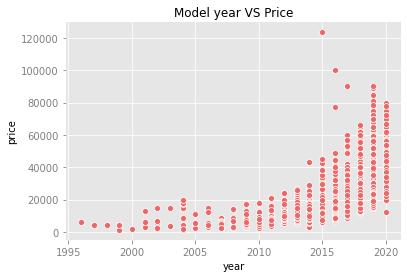

In [96]:
### Model year VS Price ###
import seaborn as sns
sns.scatterplot(x=data['year'],y=data['price'])
plt.title('Model year VS Price')

Text(0.5, 1.0, 'Model year VS MPG')

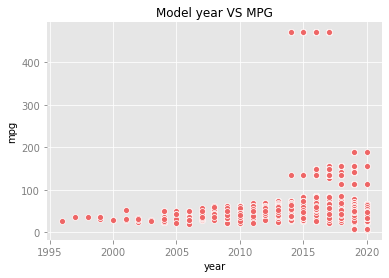

In [97]:
### Model year VS MPG ###
sns.scatterplot(x=data['year'],y=data['mpg'])
plt.title('Model year VS MPG')

Text(0, 0.5, 'frequency')

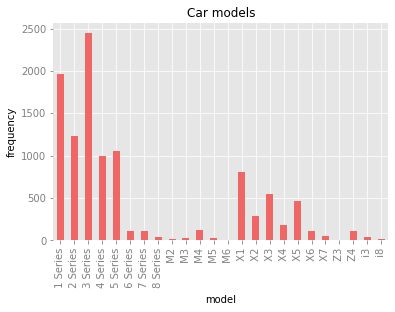

In [100]:
### Histogram of cars model ###
data.groupby(['model']).size().plot.bar()
plt.title('Car models')
plt.ylabel('frequency')

<AxesSubplot:title={'center':'Transmission'}, xlabel='transmission', ylabel='frequency'>

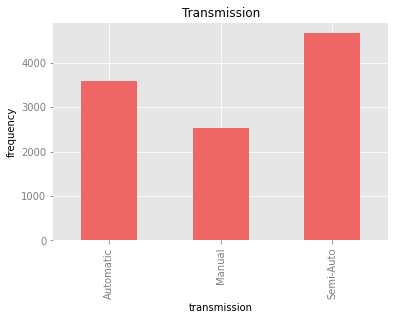

In [101]:
plt.title('Transmission')
plt.ylabel('frequency')
data.groupby(['transmission']).size().plot.bar()

Text(0, 0.5, 'frequency')

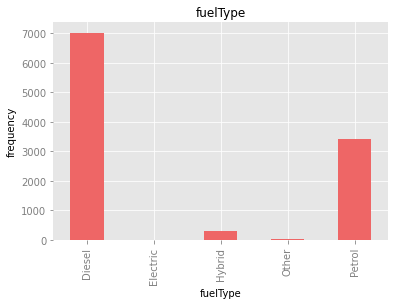

In [102]:
data.groupby(['fuelType']).size().plot.bar()
plt.title('fuelType')
plt.ylabel('frequency')

Text(0.5, 1.0, 'Tax VS Price')

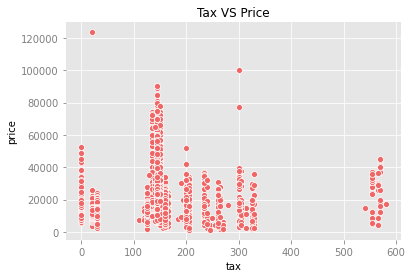

In [103]:
sns.scatterplot(x=data.tax,y=data.price)
plt.title('Tax VS Price')

Text(0.5, 1.0, 'Engine Size VS MPG')

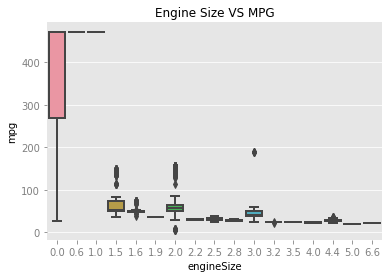

In [104]:
sns.boxplot(x=data.engineSize,y=data.mpg)
plt.title('Engine Size VS MPG')

## Model building 

### a.K- Prototype Clustering

In [13]:
from plotnine import *
import plotnine
from kmodes.kprototypes import KPrototypes
# Ignore warnings
import warnings
warnings.filterwarnings('ignore', category = FutureWarning)
### Get the categorical features columns ###
catColumnsPos = [data.columns.get_loc(col) for col in list(data.select_dtypes('object').columns)]
dfMatrix = data.to_numpy()
dfMatrix

array([[' 5 Series', 2014, 11200, ..., 125, 57.6, 2.0],
       [' 6 Series', 2018, 27000, ..., 145, 42.8, 2.0],
       [' 5 Series', 2016, 16000, ..., 160, 51.4, 3.0],
       ...,
       [' 3 Series', 2017, 13100, ..., 200, 42.8, 2.0],
       [' 1 Series', 2014, 9930, ..., 30, 64.2, 2.0],
       [' X1', 2017, 15981, ..., 125, 57.6, 2.0]], dtype=object)

In [14]:
### Apply K-prototype clustering method ###
cost = []
for cluster in range(1, 10):
    try:
        kprototype = KPrototypes(n_jobs = -1, n_clusters = cluster, init = 'Huang', random_state = 0)
        kprototype.fit_predict(dfMatrix, categorical = catColumnsPos)
        cost.append(kprototype.cost_)
        print('Cluster initiation: {}'.format(cluster))
    except:
        break

Cluster initiation: 1
Cluster initiation: 2
Cluster initiation: 3
Cluster initiation: 4
Cluster initiation: 5
Cluster initiation: 6
Cluster initiation: 7
Cluster initiation: 8
Cluster initiation: 9


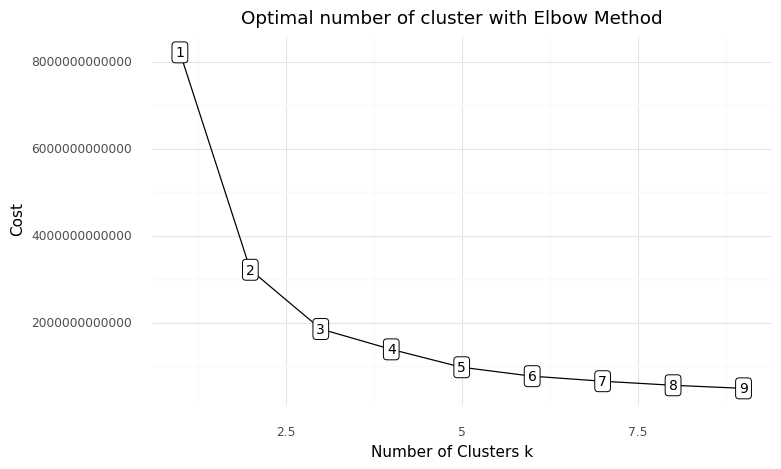

<ggplot: (-9223371917356225939)>

In [15]:
### Elbow method to find suitable numbers of cluster ###
df_cost = pd.DataFrame({'Cluster':range(1, 10), 'Cost':cost})
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_cost)+
    geom_line(aes(x = 'Cluster',
                  y = 'Cost'))+
    geom_point(aes(x = 'Cluster',
                   y = 'Cost'))+
    geom_label(aes(x = 'Cluster',
                   y = 'Cost',
                   label = 'Cluster'),
               size = 10,
               nudge_y = 1000) +
    labs(title = 'Optimal number of cluster with Elbow Method')+
    xlab('Number of Clusters k')+
    ylab('Cost')+
    theme_minimal()
)

In [89]:
# Fit the cluster
kprototype = KPrototypes(n_jobs = -1, n_clusters = 9, init = 'Huang', random_state = 0)
kprototype.fit_predict(dfMatrix, categorical = catColumnsPos)
data['Cluster Labels'] = kprototype.labels_
data['Segment'] = data['Cluster Labels'].map({0:'First', 1:'Second', 2:'Third',3:'Forth', 4:'Fifth', 5:'Sixth',6:'Seventh', 7:'Eighth', 8:'Ninth'})
# Order the cluster
data['Segment'] = data['Segment'].astype('category')
data['Segment'] = data['Segment'].cat.reorder_categories(['First','Second','Third','Forth','Fifth','Sixth','Seventh','Eighth','Ninth'])

In [90]:
data.rename(columns = {'Cluster Labels':'Total'}, inplace = True)
data.groupby('Segment').agg(
    {
        'Total':'count',
        'model': lambda x: x.value_counts().index[0],
        'transmission': lambda x: x.value_counts().index[0],
        'fuelType':lambda x: x.value_counts().index[0],
        'year': 'mean',
        'price': 'mean',
        'mileage': 'mean',
        'tax': 'mean',
        'mpg': 'mean',
        'engineSize': 'mean'
    }
).reset_index()

,Segment,Total,model,transmission,fuelType,year,price,mileage,tax,mpg,engineSize
0,First,1704,3 Series,Automatic,Diesel,2016.046362,17580.883803,32039.914906,120.240610,62.044836,2.167958
1,Second,457,3 Series,Automatic,Diesel,2013.365427,10227.126915,88006.888403,113.708972,59.898906,2.140481
2,Third,76,3 Series,Automatic,Diesel,2010.973684,6891.250000,129020.105263,162.236842,53.211842,2.234211
3,Forth,838,3 Series,Automatic,Diesel,2014.309069,12669.980907,65340.285203,110.173031,61.634129,2.150477
4,Fifth,1214,3 Series,Automatic,Diesel,2015.321252,14991.121087,46660.160626,112.182867,61.969357,2.152883
5,Sixth,2374,2 Series,Semi-Auto,Diesel,2018.807919,23578.711879,5554.987784,144.220725,54.686521,1.916849
6,Seventh,1840,1 Series,Semi-Auto,Diesel,2016.860870,19110.497283,19323.522283,132.991848,59.805326,2.111957
7,Eighth,592,X5,Semi-Auto,Diesel,2019.106419,55410.423986,4839.454392,146.798986,37.860811,3.043243
8,Ninth,1686,3 Series,Semi-Auto,Diesel,2019.138197,33911.453144,4302.460261,147.206406,48.478233,2.298102


In [91]:
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
data=pd.get_dummies(data,columns=['model','transmission','fuelType'])
data

,year,price,mileage,tax,mpg,engineSize,Total,Segment,model_ 1 Series,model_ 2 Series,...,model_ i3,model_ i8,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2014,11200,67068,125,57.6,2.0,3,Forth,0,0,...,0,0,1,0,0,1,0,0,0,0
1,2018,27000,14827,145,42.8,2.0,6,Seventh,0,0,...,0,0,1,0,0,0,0,0,0,1
2,2016,16000,62794,160,51.4,3.0,3,Forth,0,0,...,0,0,1,0,0,1,0,0,0,0
3,2017,12750,26676,145,72.4,1.5,0,First,1,0,...,0,0,1,0,0,1,0,0,0,0
4,2014,14500,39554,160,50.4,3.0,4,Fifth,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10776,2016,19000,40818,150,54.3,2.0,4,Fifth,0,0,...,0,0,1,0,0,1,0,0,0,0
10777,2016,14600,42947,125,60.1,2.0,4,Fifth,0,0,...,0,0,1,0,0,1,0,0,0,0
10778,2017,13100,25468,200,42.8,2.0,0,First,0,0,...,0,0,0,1,0,0,0,0,0,1
10779,2014,9930,45000,30,64.2,2.0,4,Fifth,1,0,...,0,0,1,0,0,1,0,0,0,0


In [ ]:
### Categorize cars into model ###
data.model=data.model.str.lstrip()
data.loc[data.model.str.endswith('s'),'model']='Sedan'
data.loc[data.model.str.startswith('M'),'model']='Sedan'
data.loc[data.model.str[0]=='X','model']='SUV'
data.loc[data.model.str[0]=='i','model']='Hatchback'
data.loc[data.model.str[0]=='Z','model']='Roadster'
data.groupby('model').size()

### b. Classification Model

In [92]:
data.rename(columns = {'Total':'Cluster'}, inplace = True)
data=data.drop('Segment',axis=1)
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
new_vect_prof=data.sample()
new_profile=new_vect_prof,
X = data.drop(['Cluster'], 1)
y = data['Cluster']
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), index=X.index, columns=X.columns)
X_train, X_test, y_train, y_test = train_test_split(X, y)
# Dummy
dummy = DummyClassifier(strategy='stratified')
# KNN
knn = KNeighborsClassifier()
# SVM
svm = SVC()
# List of models
models = [dummy, knn, svm]
# List of model names
names = ['Dummy', 'KNN', 'SVM']
# Zipping the lists
classifiers = dict(zip(names, models))
# Dictionary containing the model names and their scores
models_f1 = {}
# Looping through each model's predictions and getting their classification reports
for name, model in classifiers.items():
    # Fitting the model
    model.fit(X_train, y_train)
    
    print('\n'+ name + ' (Macro Avg - F1 Score):')
    
    # Classification Report
    report = classification_report(y_test, model.predict(X_test), output_dict=True)
    f1 = report['macro avg']['f1-score']
    
    # Assigning to the Dictionary
    models_f1[name] = f1
    
    print(f1)

# Printing out the best performing model    
print(max(models_f1, key=models_f1.get), 'Score:', max(models_f1.values()))


Dummy (Macro Avg - F1 Score):
0.11580187855307732

KNN (Macro Avg - F1 Score):
0.7737317655303583

SVM (Macro Avg - F1 Score):
0.62377238488818
KNN Score: 0.7737317655303583


In [93]:
# Fitting the model
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X,y)
# Classifying the new data 
new_vect_prof=new_vect_prof.drop(['Cluster'], 1)
designated_cluster = knn.predict(new_vect_prof)
# Narrowing down the dataset to only the designated cluster
des_cluster = (data[data['Cluster']== designated_cluster[0]])
des_cluster =des_cluster.append(new_profile)

In [94]:
corr = des_cluster.T.corr()
# Finding the Top 10 similar or correlated cars to new profile
user_n = new_profile[0].index[0]
# Creating a DF with the Top 10 most similar cars
top_10_sim = corr[[user_n]].sort_values(by=[user_n],axis=0, ascending=False)[1:11]

# Finally locating the Top 10 related cars
raw_data.loc[top_10_sim.index]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Total,Segment
5337,X4,2019,46450,Semi-Auto,9374,Diesel,145,37.2,3.0,7,Eighth
7277,X5,2019,46875,Semi-Auto,9438,Diesel,145,37.7,3.0,7,Eighth
4424,X5,2019,47440,Semi-Auto,9415,Diesel,145,37.7,3.0,7,Eighth
6644,X5,2019,45880,Semi-Auto,9000,Diesel,145,37.7,3.0,7,Eighth
6699,X5,2019,47213,Semi-Auto,9278,Diesel,145,37.7,3.0,7,Eighth
3941,M4,2019,44980,Semi-Auto,9244,Petrol,145,32.5,3.0,7,Eighth
454,X5,2019,46600,Semi-Auto,9584,Diesel,145,37.7,3.0,7,Eighth
4232,X5,2019,48980,Semi-Auto,9591,Diesel,145,37.7,3.0,7,Eighth
2771,X5,2020,48975,Semi-Auto,9998,Diesel,145,37.7,3.0,7,Eighth
6923,X5,2019,44850,Semi-Auto,9341,Diesel,145,37.7,3.0,7,Eighth
